<a href="https://colab.research.google.com/github/kradanfi/autoweight-portfolio/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
ls /gdrive/MyDrive/DJI_dataset/AAPL.json

/gdrive/MyDrive/DJI_dataset/AAPL.json


In [239]:
dataset = pd.read_json('/gdrive/MyDrive/DJI_dataset/AAPL.json')

In [249]:
df = dataset['2018-01-01':]
# df = dataset

In [250]:
eval = df[-30:]

In [251]:
df= df[:-30]

# LSTM

In [252]:
test_time = 30
look_back = 30

In [253]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

def create_lstm_model(X_train, y_train):

  model = Sequential()
  #Adding the first LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
  model.add(Dropout(0.2))
  # Adding a second LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a third LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a fourth LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50))
  model.add(Dropout(0.2))
  # Adding the output layer
  model.add(Dense(units = 1))

  # Compiling the RNN
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')

  # Fitting the RNN to the Training set
  model.fit(X_train, y_train, epochs = 100, batch_size = 32)
  return model

In [254]:
future_ind

,Date,ADXR,ADXR_predict
0,2019-11-18,36.056741,35.740910
1,2019-11-19,35.756833,36.079082
2,2019-11-20,35.092831,35.922192
3,2019-11-21,34.606414,35.309616
4,2019-11-22,34.118034,34.568317
5,2019-11-25,33.878489,33.948704
6,2019-11-26,33.939363,33.622059
7,2019-11-27,33.885592,33.655685
8,2019-11-29,33.993180,33.835381
9,2019-12-02,33.610379,33.999008


In [255]:
future_ind = pd.DataFrame()
future_ind["Date"] = df[df.shape[0]-look_back:].index

In [256]:
# for ind in range(0,len(df.columns)):
#   print(df.columns[ind])
#   # setting train test 
#   training_set = df.iloc[:df.shape[0]-test_time,ind:ind+1].values
#   test_set = df.iloc[df.shape[0]-test_time:,ind:ind+1].values

#   # normalize
#   sc = MinMaxScaler(feature_range = (0, 1))
#   training_set_scaled = sc.fit_transform(training_set)
#   print(training_set_scaled.shape)

#   # prepare train data
#   X_train = []
#   y_train = []
#   for i in range(30, training_set_scaled.shape[0]):
#       X_train.append(training_set_scaled[i-30:i, 0])
#       y_train.append(training_set_scaled[i, 0])
#   X_train, y_train = np.array(X_train), np.array(y_train)

#   X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#   print(X_train.shape)

#   # prepare input for model lstmp
#   dataset_train = df.iloc[:df.shape[0]-test_time, ind:ind+1]
#   dataset_test = df.iloc[df.shape[0]-test_time:, ind:ind+1]
#   dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
#   inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
#   inputs = inputs.reshape(-1,1)
#   inputs = sc.transform(inputs)
#   print(inputs.shape)


#   #train model
#   model = create_lstm_model(X_train,y_train)

#   # prepare test
#   X_test = []
#   for i in range(30, inputs.shape[0]):
#       X_test.append(inputs[i-30:i, 0])
#   X_test = np.array(X_test)
#   X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#   print(X_test.shape)

#   #predict
#   predicted_stock_price = model.predict(X_test)
#   predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#   #recode 
#   future_ind[df.columns[ind]] = pd.DataFrame(np.array(dataset_test))
#   future_ind[df.columns[ind]+"_predict"] = pd.DataFrame(predicted_stock_price)
#   plt.figure(figsize=(10,10))
#   plt.plot(predicted_stock_price, 'r--', label="predic")
#   plt.plot(np.array(dataset_test), label="real")
#   plt.legend()
#   plt.show()

In [257]:
# plt.figure(figsize=(10,10))
# plt.plot(predicted_stock_price, 'r--', label="predic")
# plt.plot(np.array(dataset_test), label="close")
# plt.legend()
# plt.show()

In [258]:
# future_ind

In [259]:
# future_ind.to_json(r'/gdrive/MyDrive/DJI_predict/test.json')

# test next month

ADXR
(443, 1)
(413, 30, 1)
(60, 1)
Epoch 1/100
13/13 [==============================] - 8s 64ms/step - loss: 0.1639
Epoch 2/100
13/13 [==============================] - 1s 64ms/step - loss: 0.0544
Epoch 3/100
13/13 [==============================] - 1s 66ms/step - loss: 0.0420
Epoch 4/100
13/13 [==============================] - 1s 63ms/step - loss: 0.0263
Epoch 5/100
13/13 [==============================] - 1s 64ms/step - loss: 0.0194
Epoch 6/100
13/13 [==============================] - 1s 64ms/step - loss: 0.0205
Epoch 7/100
13/13 [==============================] - 1s 63ms/step - loss: 0.0209
Epoch 8/100
13/13 [==============================] - 1s 67ms/step - loss: 0.0201
Epoch 9/100
13/13 [==============================] - 1s 65ms/step - loss: 0.0143
Epoch 10/100
13/13 [==============================] - 1s 64ms/step - loss: 0.0126
Epoch 11/100
13/13 [==============================] - 1s 66ms/step - loss: 0.0112
Epoch 12/100
13/13 [==============================] - 1s 66ms/step - los

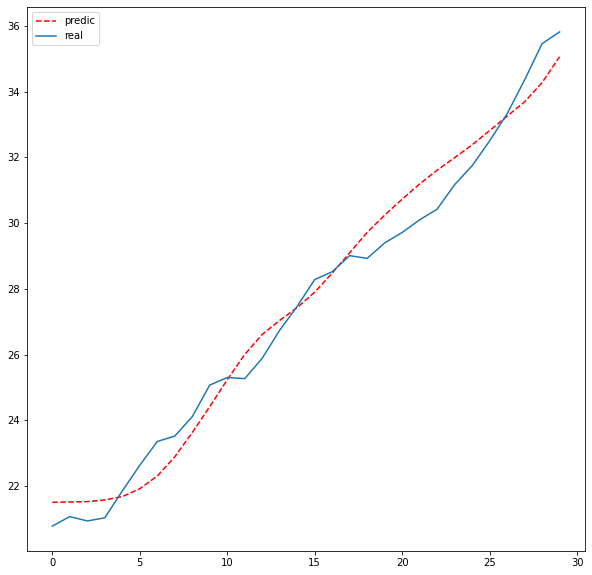

In [260]:
  ind = 1
  print(df.columns[ind])
  # setting train test 
  training_set = df.iloc[:df.shape[0]-look_back,ind:ind+1].values
  test_set = df.iloc[df.shape[0]-look_back:,ind:ind+1].values

  # normalize
  sc = MinMaxScaler(feature_range = (0, 1))
  training_set_scaled = sc.fit_transform(training_set)
  print(training_set_scaled.shape)

  # prepare train data
  X_train = []
  y_train = []
  for i in range(look_back, training_set_scaled.shape[0]):
      X_train.append(training_set_scaled[i-look_back:i, 0])
      y_train.append(training_set_scaled[i, 0])
  X_train, y_train = np.array(X_train), np.array(y_train)

  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  print(X_train.shape)

  # prepare input for model lstmp
  dataset_train = df.iloc[:df.shape[0]-test_time, ind:ind+1]
  dataset_test = df.iloc[df.shape[0]-test_time:, ind:ind+1]
  dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
  inputs = dataset_total[len(dataset_total) - len(dataset_test) - look_back:].values
  inputs = inputs.reshape(-1,1)
  inputs = sc.transform(inputs)
  print(inputs.shape)


  #train model
  model = create_lstm_model(X_train,y_train)

  # prepare test
  X_test = []
  for i in range(look_back, inputs.shape[0]):
      X_test.append(inputs[i-look_back:i, 0])
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  print(X_test.shape)

  #predict
  predicted_stock_price = model.predict(X_test)
  predicted_stock_price = sc.inverse_transform(predicted_stock_price)

  #recode 
  future_ind[df.columns[ind]] = pd.DataFrame(np.array(dataset_test))
  future_ind[df.columns[ind]+"_predict"] = pd.DataFrame(predicted_stock_price)
  plt.figure(figsize=(10,10))
  plt.plot(predicted_stock_price, 'r--', label="predic")
  plt.plot(np.array(dataset_test), label="real")
  plt.legend()
  plt.show()

In [261]:
    prediction_list = inputs[-60:-30]
    
    for _ in range(30):
        x = prediction_list[-30:]
        x = x.reshape((1, 30, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
        # print(prediction_list)
    prediction_list = prediction_list[30-1:]

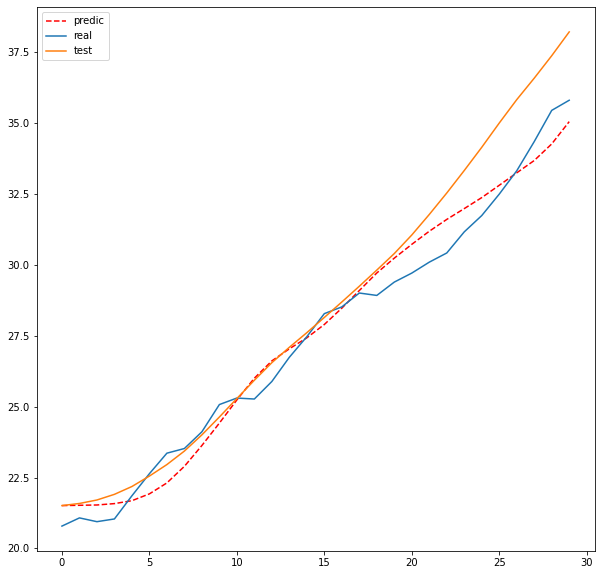

In [262]:
  plt.figure(figsize=(10,10))
  plt.plot(predicted_stock_price, 'r--', label="predic")
  plt.plot(np.array(dataset_test), label="real")
  plt.plot(np.array(sc.inverse_transform(prediction_list[-30:].reshape((30, 1)))), label="test")
  plt.legend()
  plt.show()